In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import pickle
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [65]:
df1 = pd.read_csv('C:\\Users\\ADMIN\\New folder\\ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2 = pd.read_csv('C:\\Users\\ADMIN\\New folder\\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3 = pd.read_csv('C:\\Users\\ADMIN\\New folder\\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4 = pd.read_csv('C:\\Users\\ADMIN\\New folder\\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5 = pd.read_csv('C:\\Users\\ADMIN\\New folder\\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

## Merging 5 dataframes

In [66]:
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [67]:
combined_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [68]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926357 entries, 0 to 926356
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                926357 non-null  object 
 1   town                 926357 non-null  object 
 2   flat_type            926357 non-null  object 
 3   block                926357 non-null  object 
 4   street_name          926357 non-null  object 
 5   storey_range         926357 non-null  object 
 6   floor_area_sqm       926357 non-null  float64
 7   flat_model           926357 non-null  object 
 8   lease_commence_date  926357 non-null  int64  
 9   resale_price         926357 non-null  float64
 10  remaining_lease      217307 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.7+ MB


In [73]:
df = combined_df

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926357 entries, 0 to 926356
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                926357 non-null  object 
 1   town                 926357 non-null  object 
 2   flat_type            926357 non-null  object 
 3   block                926357 non-null  object 
 4   street_name          926357 non-null  object 
 5   storey_range         926357 non-null  object 
 6   floor_area_sqm       926357 non-null  float64
 7   flat_model           926357 non-null  object 
 8   lease_commence_date  926357 non-null  int64  
 9   resale_price         926357 non-null  float64
 10  remaining_lease      217307 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.7+ MB


In [77]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

## Exploratory Data Analysis

In [79]:
def exploratory_analysis(df):
    numeric_cols = ['floor_area_sqm', 'resale_price', 'lease_commence_date']
    df[numeric_cols].describe()

    # Data distribution plots
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Correlation analysis
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

    # Categorical variables analysis
    categorical_cols = ['town','flat_type','storey_range', 'flat_model']
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(4, 2, i)
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Countplot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Relationship between features and target variable
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price', alpha=0.7)
    plt.title('Floor Area vs Resale Price')
    plt.xlabel('Floor Area (sqm)')
    plt.ylabel('Resale Price')
    plt.show()



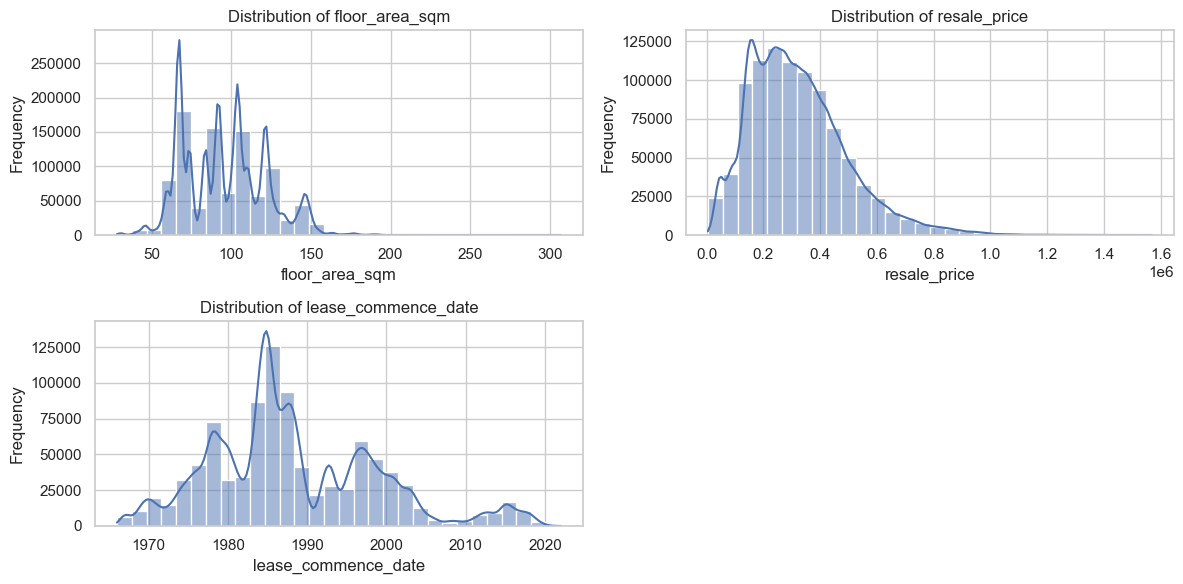

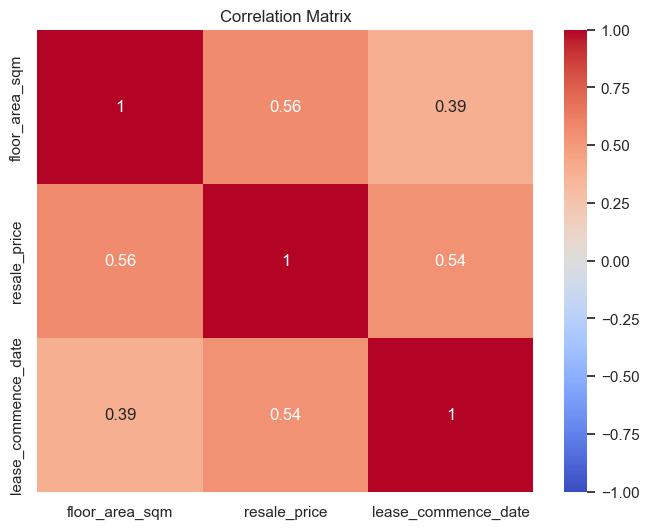

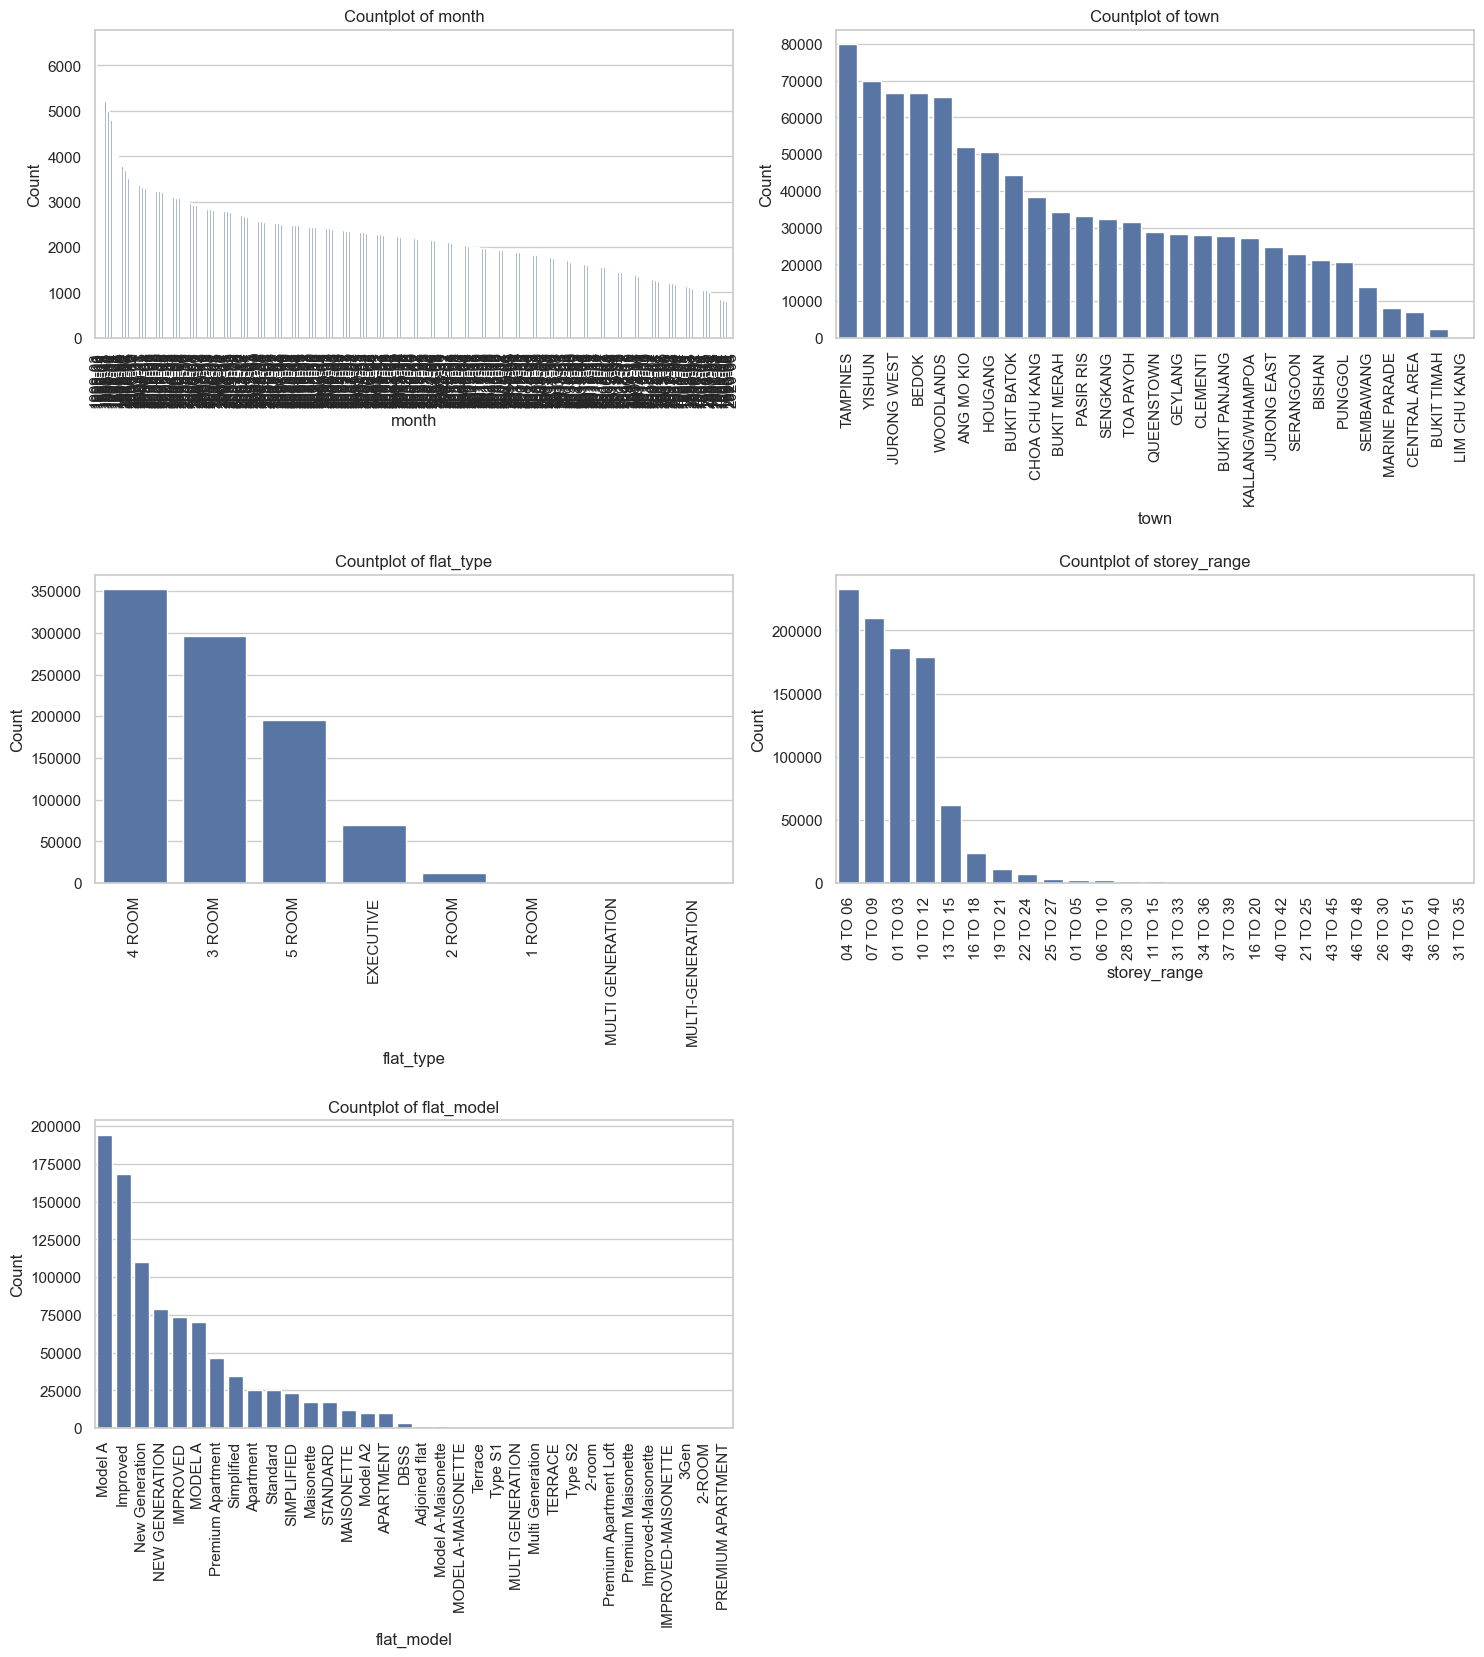

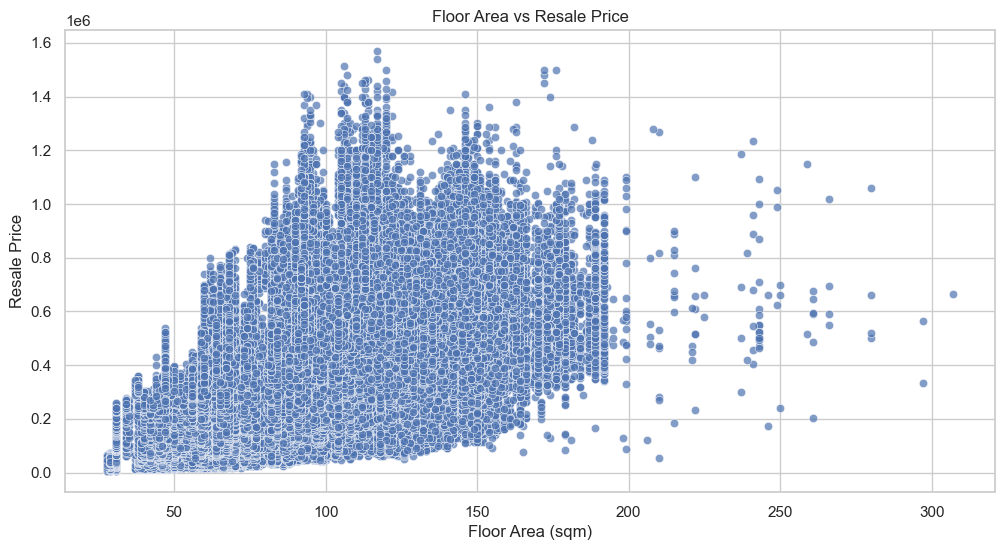

In [80]:
exploratory_analysis(df)

## Data Preprocessing

In [81]:
def data_preprocessing(df,load_label_encoders=True,load_scaler=True, filename='label_encoders.pkl',scaler_filename='scaler.pkl'):

    df['remaining_lease'] = df['remaining_lease'].fillna('UNKNOWN')
    df['month'] = pd.to_datetime(df['month'])
    df['year'] = df['month'].dt.year
    df['month'] = df['month'].dt.month
    df = df.drop(columns = ['flat_type'])

    categorical_columns = ['town','block', 'street_name', 'storey_range', 'flat_model','remaining_lease']

    df['remaining_lease'] = df['remaining_lease'].astype(str)

    # Initialize LabelEncoder
    label_encoders = {}
    
    if load_label_encoders:
        # Load the saved label encoders
        with open(filename, 'rb') as f:
            label_encoders = pickle.load(f)
    # Iterate over each categorical column
    for col in categorical_columns:
        # Initialize LabelEncoder for each column
        if col in label_encoders:
            # Transform using loaded LabelEncoders
            df[col] = df[col].map(lambda s: label_encoders[col].transform([s])[0] if s in label_encoders[col].classes_ else -1)
        else:
            # Initialize and fit LabelEncoder for new data
            label_encoders[col] = LabelEncoder()
            df[col] = label_encoders[col].fit_transform(df[col])
    if not load_label_encoders:
        with open(filename, 'wb') as f:
            pickle.dump(label_encoders, f)

    df_encoded = df.copy()
    

    scaler = StandardScaler()
    if load_scaler:
        # Load the saved scaler
        with open(scaler_filename, 'rb') as f:
            scaler = pickle.load(f)
        df_encoded['floor_area_sqm'] = scaler.transform(df_encoded[['floor_area_sqm']])
    else:
        df_encoded['floor_area_sqm'] = scaler.fit_transform(df_encoded[['floor_area_sqm']])
        # Save the scaler
        with open(scaler_filename, 'wb') as f:
            pickle.dump(scaler, f)
    return(df_encoded,label_encoders,scaler)

In [82]:
df_encoded,label_encoders,scaler = data_preprocessing(df,load_label_encoders=False,load_scaler=False)

In [83]:
df_encoded.columns

Index(['month', 'town', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year'],
      dtype='object')

In [84]:
df_encoded.head()

,month,town,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,830,13,5,-2.504866,7,1977,9000.0,724,1990
1,1,0,830,13,2,-2.504866,7,1977,6000.0,724,1990
2,1,0,830,13,5,-2.504866,7,1977,8000.0,724,1990
3,1,0,830,13,4,-2.504866,7,1977,6000.0,724,1990
4,1,0,447,13,2,-0.878616,20,1976,47200.0,724,1990


## Function to plot floor area

In [87]:
def plot_floor_area(df_encoded):
    sns.set(style="whitegrid")

    # Create a figure with two subplots: one for the boxplot and one for the histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot
    sns.boxplot(y=df_encoded['floor_area_sqm'], ax=axes[0])
    axes[0].set_title('Boxplot of Floor Area (sqm) with outiers')
    axes[0].set_xlabel('Floor Area (sqm)')

    # Histogram
    sns.histplot(df_encoded['floor_area_sqm'], bins=10, kde=True, ax=axes[1])
    axes[1].set_title('Histogram of Floor Area (sqm) with outliers')
    axes[1].set_xlabel('Floor Area (sqm)')
    axes[1].set_ylabel('Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_encoded['floor_area_sqm'].quantile(0.25)
    Q3 = df_encoded['floor_area_sqm'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df_encoded[(df_encoded['floor_area_sqm'] >= lower_bound) & (df_encoded['floor_area_sqm'] <= upper_bound)]


    sns.set(style="whitegrid")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot after removing outliers
    sns.boxplot(y=df_filtered['floor_area_sqm'], ax=axes[0])
    axes[0].set_title('Boxplot of Floor Area (sqm) - After Outlier Removal')
    axes[0].set_ylabel('Floor Area (sqm)')

    # Histogram after removing outliers
    sns.histplot(df_filtered['floor_area_sqm'], bins=10, kde=True, ax=axes[1])
    axes[1].set_title('Histogram of Floor Area (sqm) - After Outlier Removal')
    axes[1].set_xlabel('Floor Area (sqm)')
    axes[1].set_ylabel('Frequency')

    # Show the plots
    plt.tight_layout()
    plt.show()
    return(df_filtered)


## Plot of floor area before and after outlier removal

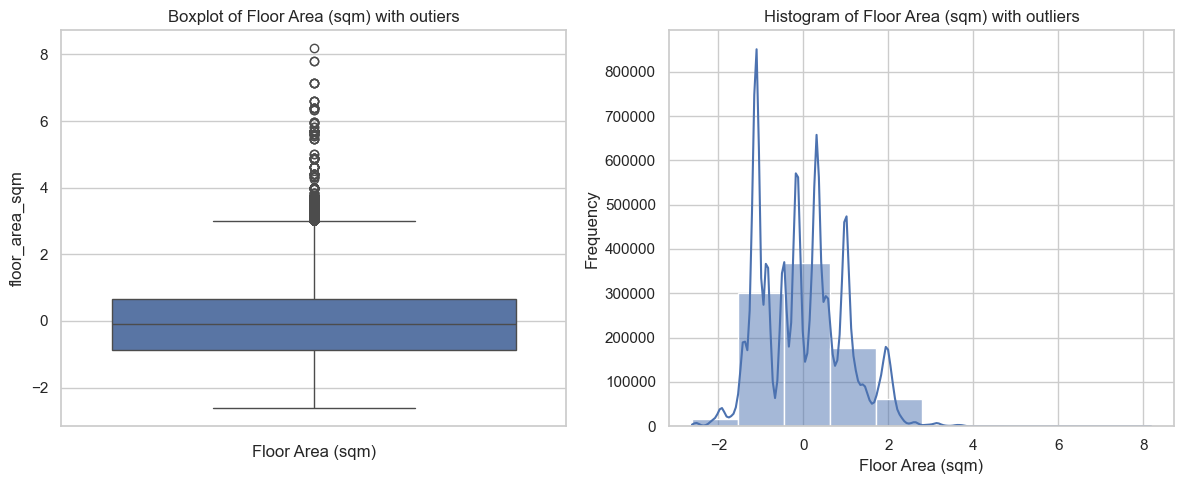

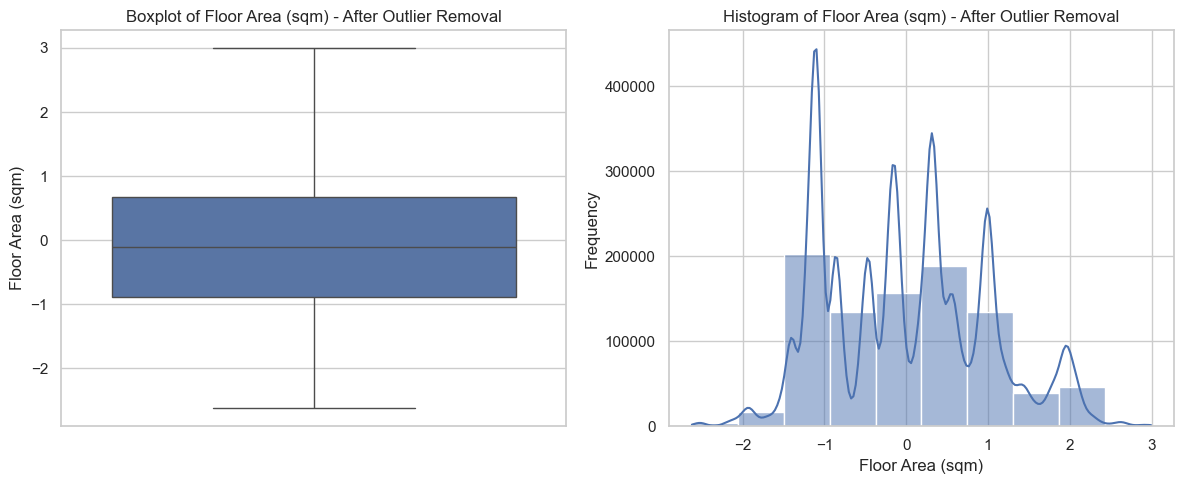

In [88]:
df_filtered = plot_floor_area(df_encoded)

## Function to plot town

In [91]:
def plot_town(df_filtered):
    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(y='town', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Town')
    axes[0].set_xlabel('Town')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['town'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Town')
    axes[1].set_xlabel('Town')
    axes[1].set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_filtered['town'].quantile(0.25)
    Q3 = df_filtered['town'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df_filtered[(df_filtered['town'] >= lower_bound) & (df_filtered['town'] <= upper_bound)]

    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(y='town', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Town')
    axes[0].set_xlabel('Town')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['town'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Town')
    axes[1].set_xlabel('Town')
    axes[1].set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

## Plot of town before and after outlier removal

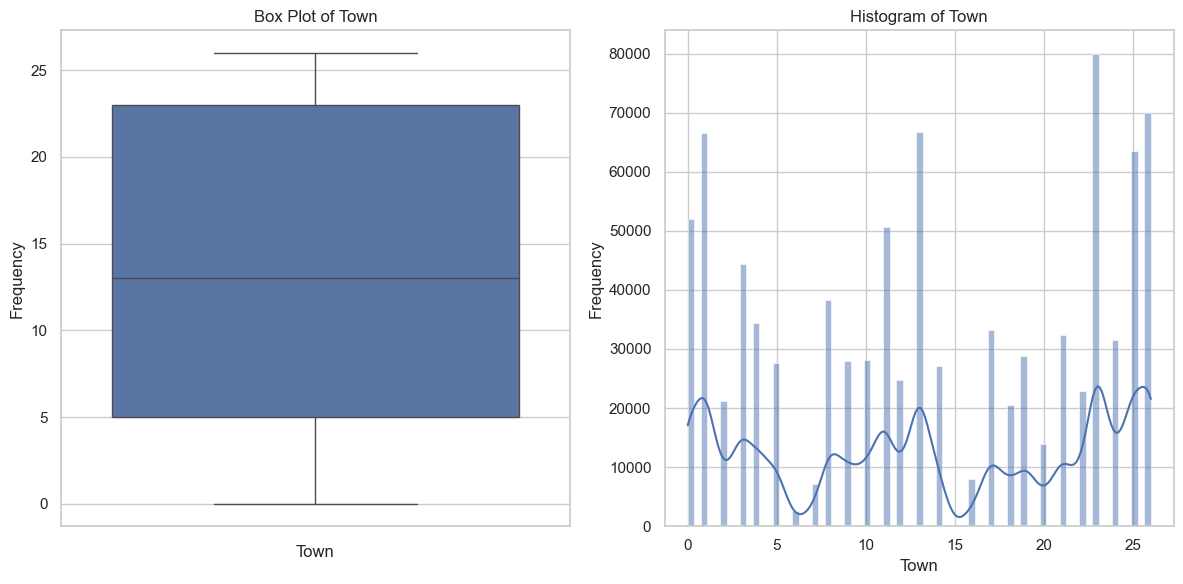

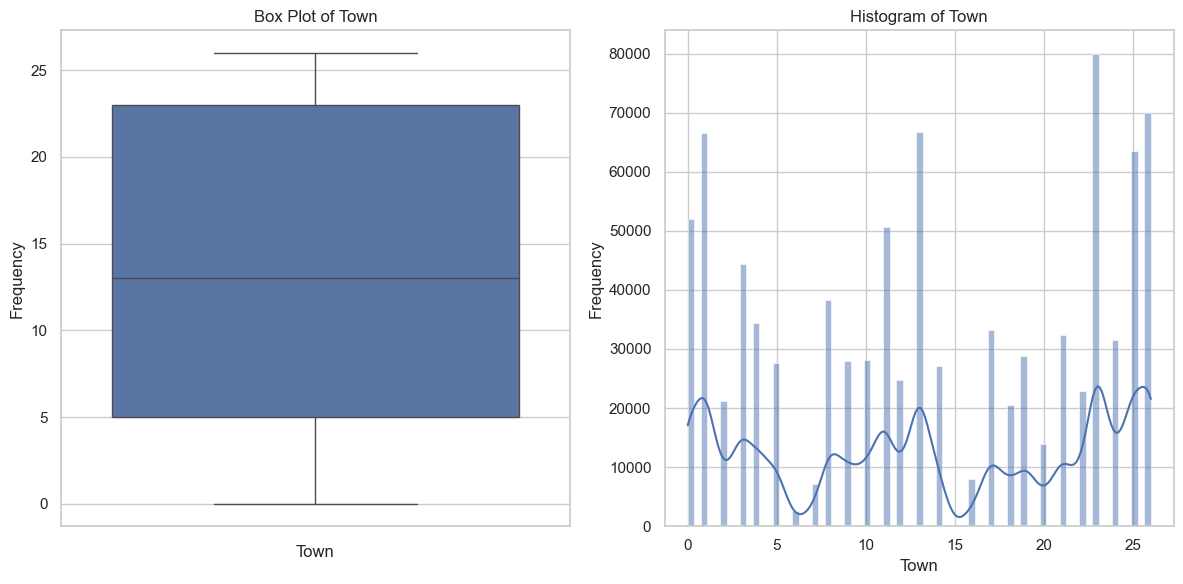

In [92]:
plot_town(df_filtered)

## Function to plot block

In [94]:
def plot_block(df_filtered):
    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='block', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Block')
    axes[0].set_xlabel('Block')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['block'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Block')
    axes[1].set_xlabel('Block')
    axes[1].set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_filtered['block'].quantile(0.25)
    Q3 = df_filtered['block'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df_filtered[(df_filtered['block'] >= lower_bound) & (df_filtered['block'] <= upper_bound)]

    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='block', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Block after removing outliers')
    axes[0].set_xlabel('Block')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['block'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Block after removing outliers')
    axes[1].set_xlabel('Block')
    axes[1].set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

## Plot of block before and after outlier removal

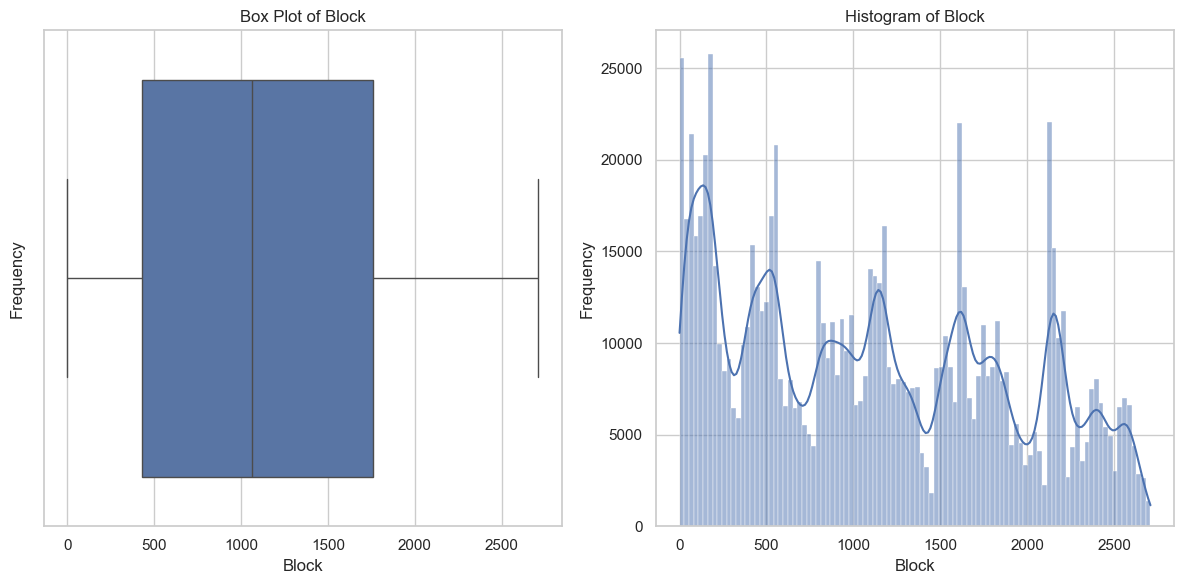

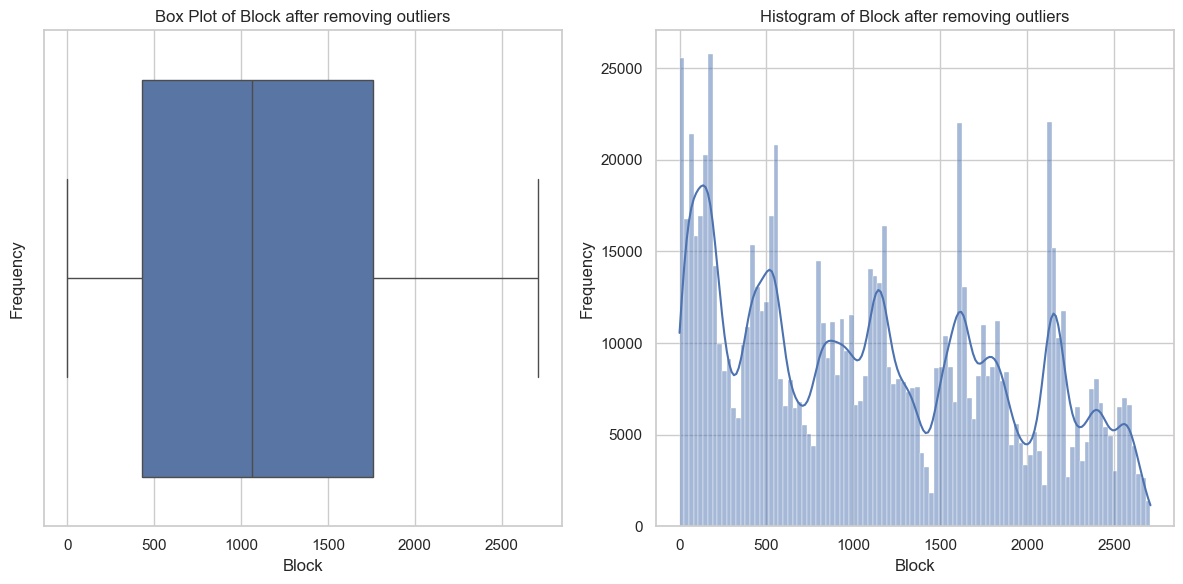

In [95]:
plot_block(df_filtered)

## Function to plot street name

In [96]:
def plot_street_name(df_filtered):
    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='street_name', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Street Name')
    axes[0].set_xlabel('Street Name')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['street_name'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Street Name')
    axes[1].set_xlabel('Street Name')
    axes[1].set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_filtered['street_name'].quantile(0.25)
    Q3 = df_filtered['street_name'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df_filtered[(df_filtered['street_name'] >= lower_bound) & (df_filtered['street_name'] <= upper_bound)]

    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='street_name', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Street Name after removing outliers')
    axes[0].set_xlabel('Street Name')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['street_name'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Street Name after removing outliers')
    axes[1].set_xlabel('Street Name')
    axes[1].set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

## Plot of street name before and after outlier removal

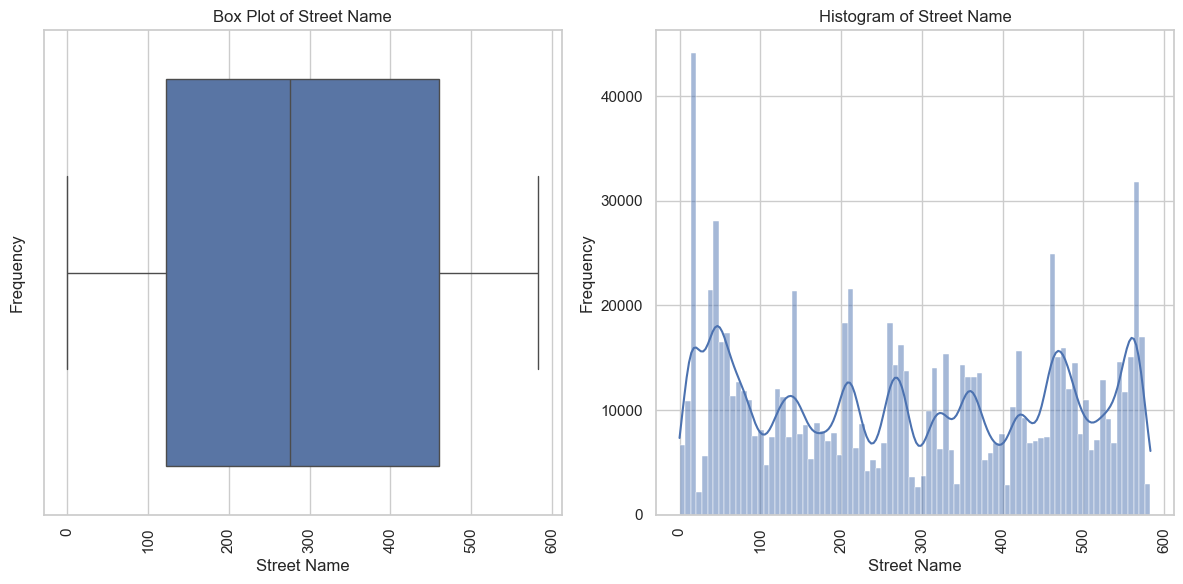

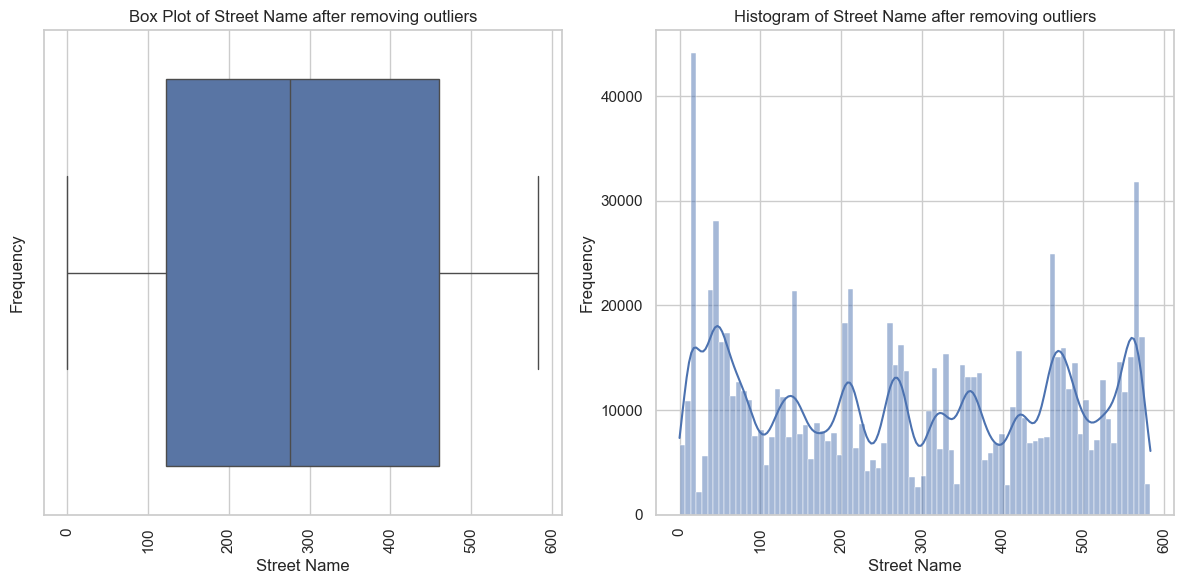

In [97]:
plot_street_name(df_filtered)

## Function to plot storey range

In [99]:
def plot_storey_range(df_filtered):
    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='storey_range', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Storey Range')
    axes[0].set_xlabel('Storey Range')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['storey_range'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Storey Range')
    axes[1].set_xlabel('Storey Range')
    axes[1].set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_filtered['storey_range'].quantile(0.25)
    Q3 = df_filtered['storey_range'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df_filtered[(df_filtered['storey_range'] >= lower_bound) & (df_filtered['storey_range'] <= upper_bound)]
    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='storey_range', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Storey Range')
    axes[0].set_xlabel('Storey Range')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['storey_range'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Storey Range')
    axes[1].set_xlabel('Storey Range')
    axes[1].set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

## Plot of Storey Range before and after outlier removal

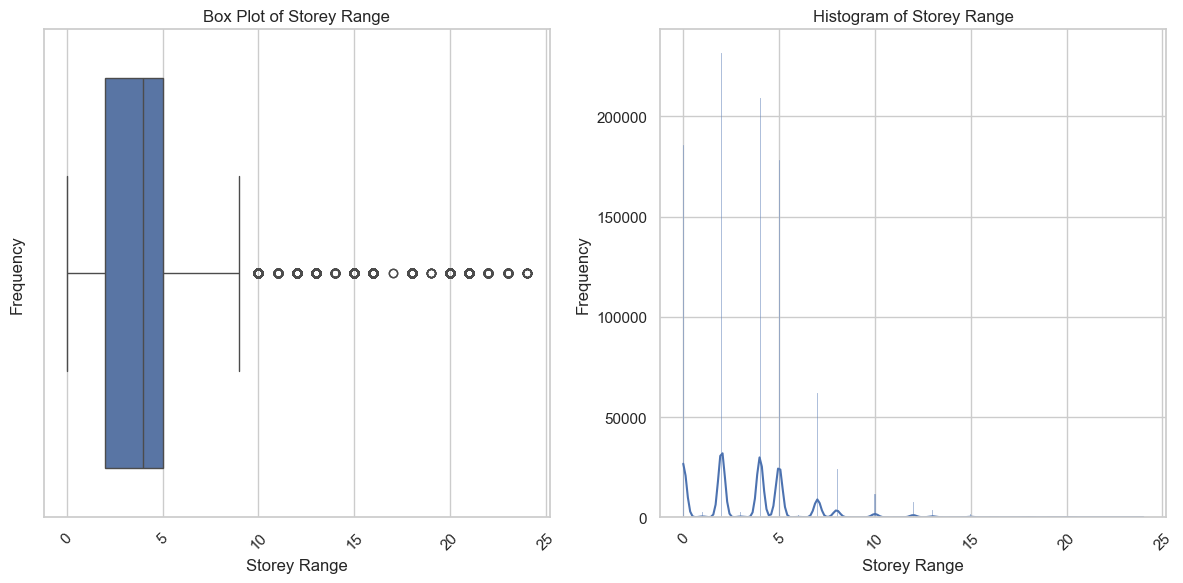

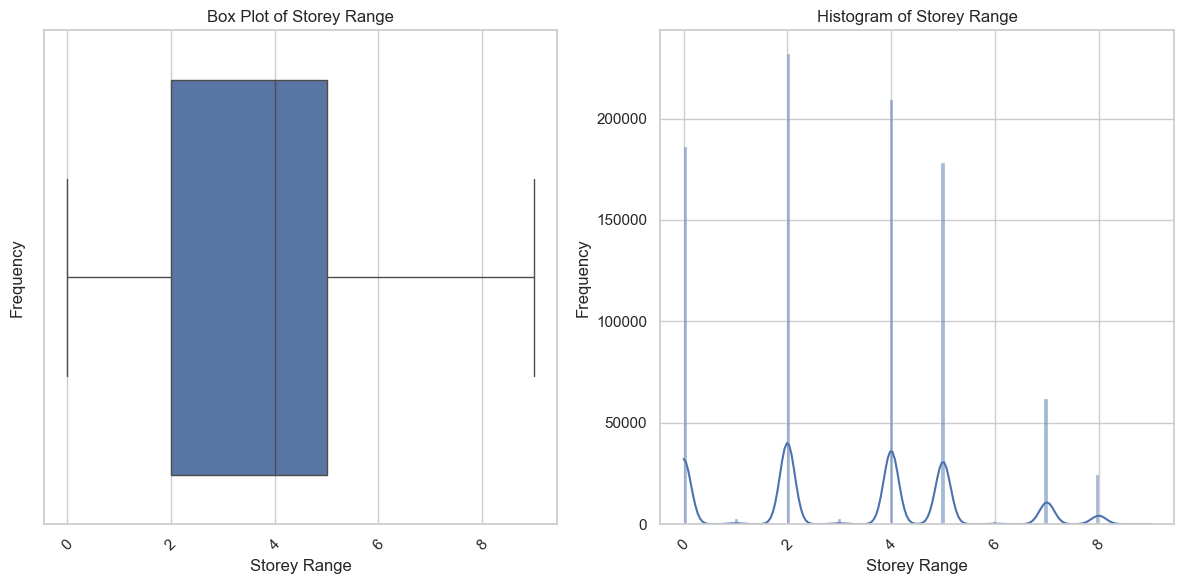

In [100]:
plot_storey_range(df_filtered)

## Function to plot flat model

In [101]:
def plot_flat_model(df_filtered):
    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='flat_model', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Flat Model')
    axes[0].set_xlabel('Flat Model')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['flat_model'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Flat Model')
    axes[1].set_xlabel('Flat Model')
    axes[1].set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_filtered['flat_model'].quantile(0.25)
    Q3 = df_filtered['flat_model'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df_filtered[(df_filtered['flat_model'] >= lower_bound) & (df_filtered['flat_model'] <= upper_bound)]

    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='flat_model', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Flat Model after removing outliers')
    axes[0].set_xlabel('Flat Model')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['flat_model'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Flat Model after removing outliers')
    axes[1].set_xlabel('Flat Model')
    axes[1].set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

## Plot of flat model before and after outlier removal

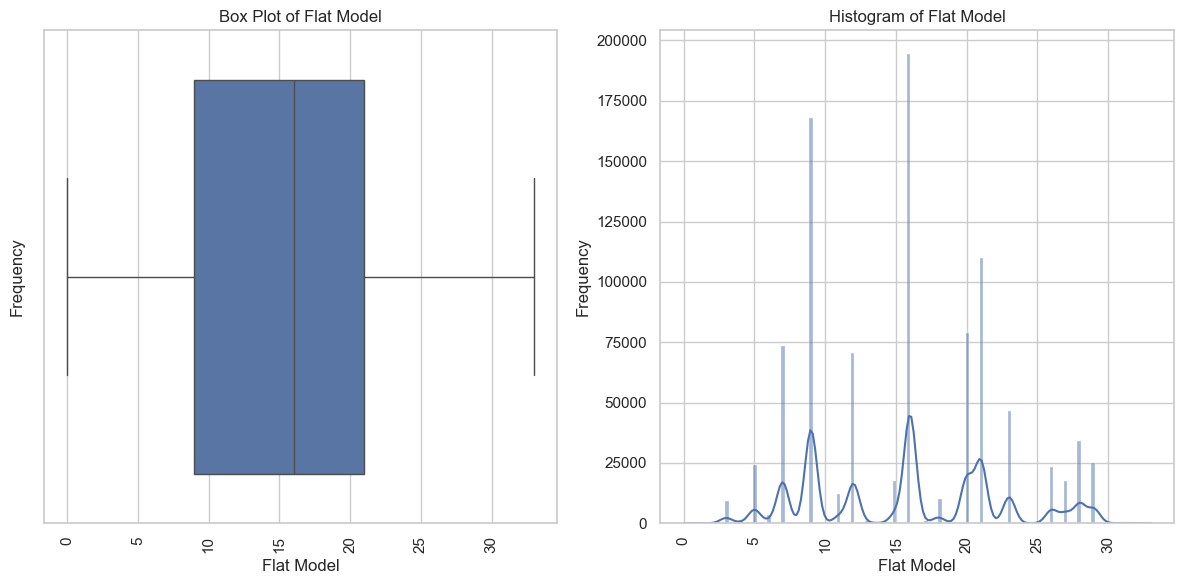

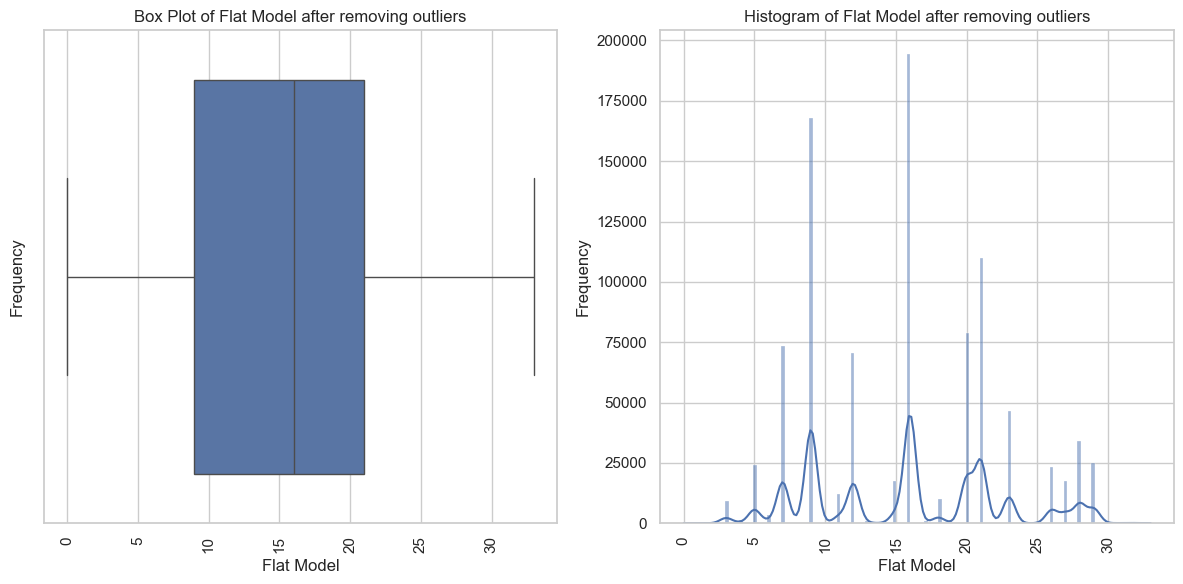

In [102]:
plot_flat_model(df_filtered)

## Function to plot the Remaining Lease

In [103]:
def plot_remaining_lease(df_filtered):
    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='remaining_lease', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Remaining Lease')
    axes[0].set_xlabel('Remaining Lease')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['remaining_lease'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Remaining Lease')
    axes[1].set_xlabel('Remaining Lease')
    axes[1].set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_filtered['remaining_lease'].quantile(0.25)
    Q3 = df_filtered['remaining_lease'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Determine outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_filtered = df_filtered[(df_filtered['remaining_lease'] >= lower_bound) & (df_filtered['remaining_lease'] <= upper_bound)]
    sns.set_style("whitegrid")

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Box plot
    sns.boxplot(x='remaining_lease', data=df_filtered, ax=axes[0])
    axes[0].set_title('Box Plot of Remaining Lease after removing outliers')
    axes[0].set_xlabel('Remaining Lease')
    axes[0].set_ylabel('Frequency')

    # Histogram
    sns.histplot(df_filtered['remaining_lease'], ax=axes[1], kde=True)
    axes[1].set_title('Histogram of Remaining Lease after removing outliers')
    axes[1].set_xlabel('Remaining Lease')
    axes[1].set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    axes[0].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='x', rotation=90)

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

## Plot of Remaining Lease before and after removal of outliers

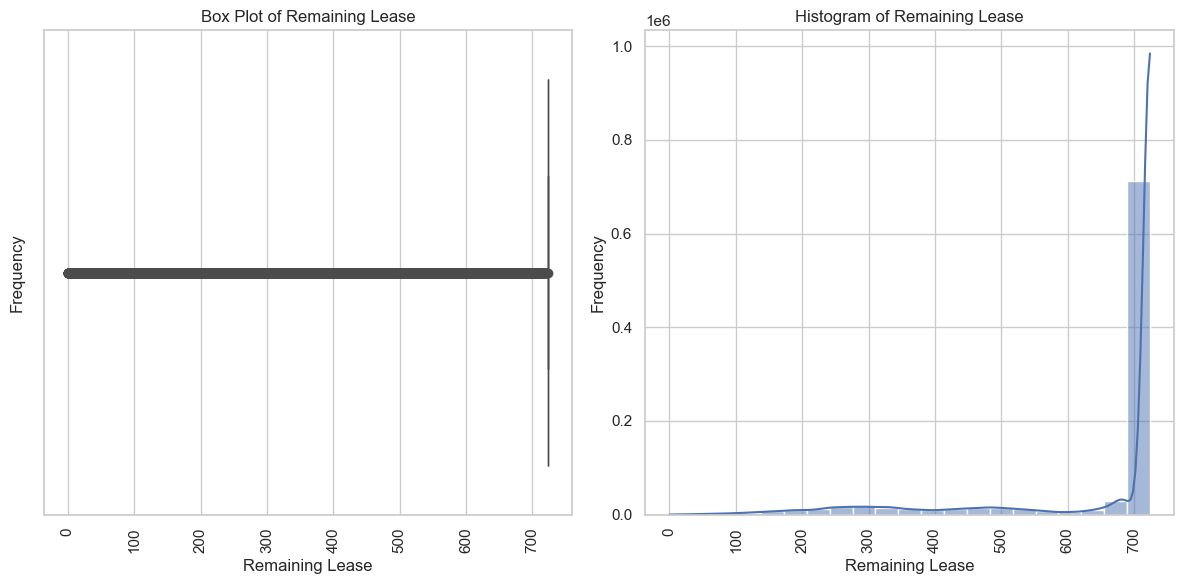

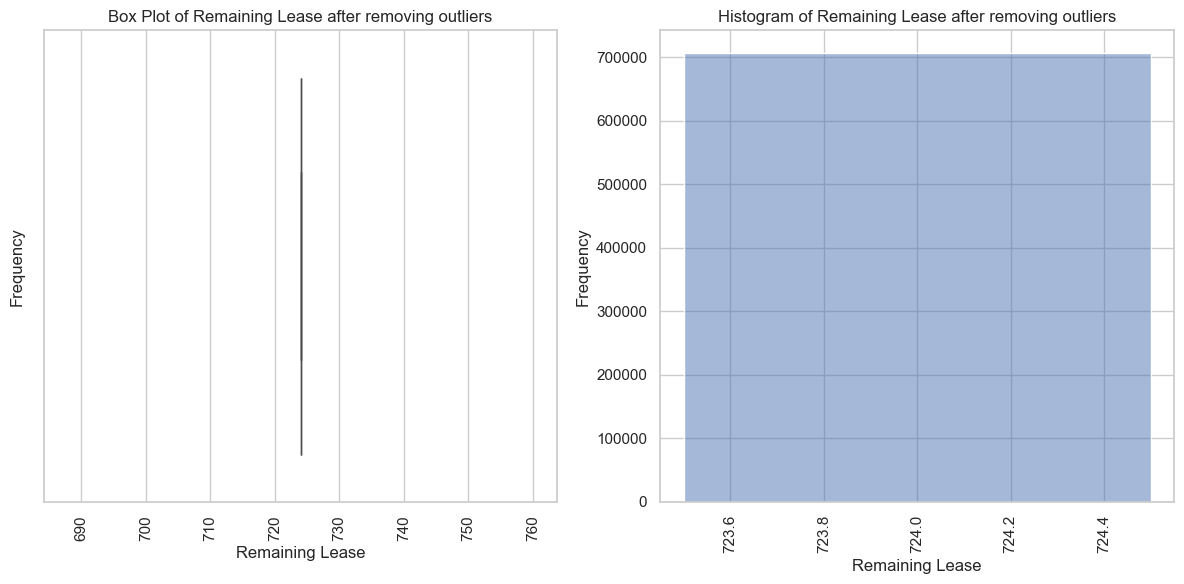

In [104]:
plot_remaining_lease(df_filtered)

## Correlation Matrix 

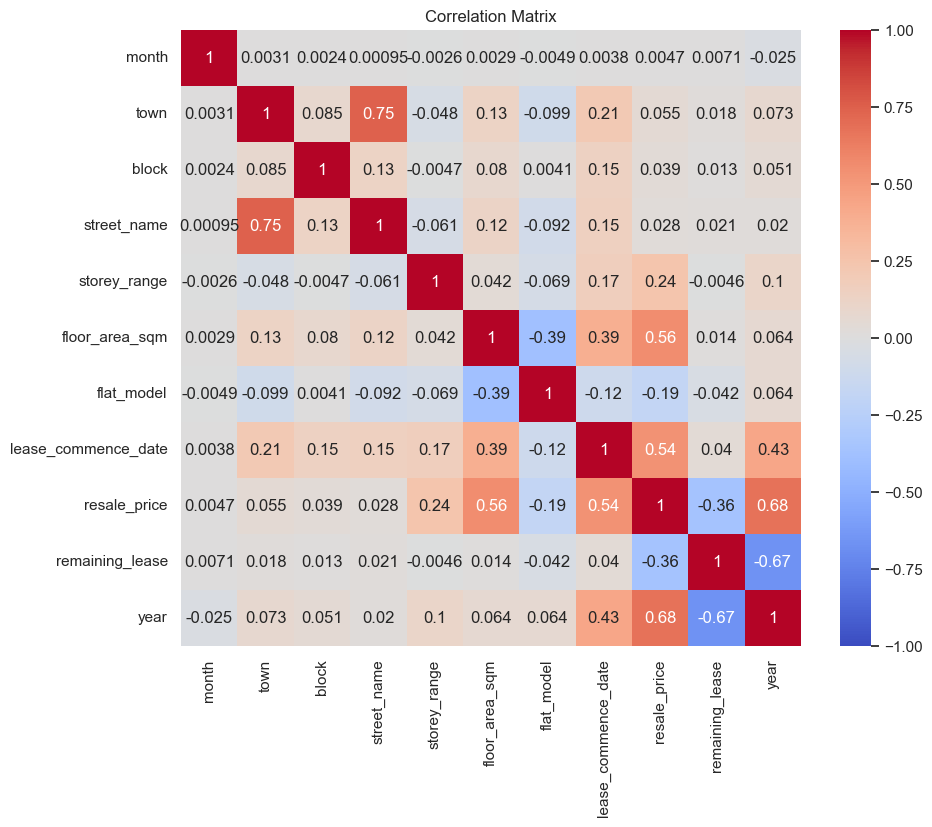

In [105]:
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Information of filtered dataframe

In [106]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923952 entries, 0 to 926356
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                923952 non-null  int32  
 1   town                 923952 non-null  int32  
 2   block                923952 non-null  int32  
 3   street_name          923952 non-null  int32  
 4   storey_range         923952 non-null  int32  
 5   floor_area_sqm       923952 non-null  float64
 6   flat_model           923952 non-null  int32  
 7   lease_commence_date  923952 non-null  int64  
 8   resale_price         923952 non-null  float64
 9   remaining_lease      923952 non-null  int32  
 10  year                 923952 non-null  int32  
dtypes: float64(2), int32(8), int64(1)
memory usage: 56.4 MB


## Filtered dataframe after data preprocessing

In [107]:
df_filtered.head()

,month,town,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,830,13,5,-2.504866,7,1977,9000.0,724,1990
1,1,0,830,13,2,-2.504866,7,1977,6000.0,724,1990
2,1,0,830,13,5,-2.504866,7,1977,8000.0,724,1990
3,1,0,830,13,4,-2.504866,7,1977,6000.0,724,1990
4,1,0,447,13,2,-0.878616,20,1976,47200.0,724,1990


## Basic XGBoost model Training

In [108]:
# Assuming you have your features and target variable separated
X = df_filtered.drop(columns=['resale_price'])  # Features
y = df_filtered['resale_price']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the XGBoost model
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgbr.predict(X_test)

# Calculating RMSE and R-squared score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared score:", r_squared)



RMSE: 24464.65559583224
R-squared score: 0.9792226007251029


## Cross validation of XGBoost

In [109]:
# Assuming you have your features and target variable separated
X = df_filtered.drop(columns=['resale_price'])  # Features
y = df_filtered['resale_price']  # Target variable

# Creating the XGBoost model
xgbr = xgb.XGBRegressor()

# Performing k-fold cross-validation
cv_scores = cross_val_score(xgbr, X, y, cv=10, scoring='neg_mean_squared_error')

# Since cross_val_score returns negative mean squared error,
# we need to take the negative and square root to get RMSE
rmse_scores = (-cv_scores)**0.5

# Calculating the mean RMSE
mean_rmse = rmse_scores.mean()

print("Cross-validated RMSE:", mean_rmse)

Cross-validated RMSE: 56008.845071476


## XGBoost Regression after Hyper parameter tuning

In [110]:
#def xgb_regression(df_filtered):
# Assuming you have your features and target variable separated
X = df_filtered.drop(columns=['resale_price'])  # Features
y = df_filtered['resale_price']  # Target variable

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Define early stopping criteria
early_stopping_rounds = 10

# Train the model with early stopping
model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'validation')], early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

# Save the trained model
model.save_model('xgb_model.model')

# Predict on the validation set
y_pred = model.predict(dval)

# Evaluate the model
rmse = mean_squared_error(y_val, y_pred, squared=False)
print("RMSE on validation set:", rmse)

r2 = r2_score(y_val, y_pred)
print("R^2 Score:", r2)

[0]	validation-rmse:155658.76387
[1]	validation-rmse:143227.35262
[2]	validation-rmse:132126.68609
[3]	validation-rmse:124043.98713
[4]	validation-rmse:115122.92363
[5]	validation-rmse:107371.12839
[6]	validation-rmse:100528.86297
[7]	validation-rmse:95716.06622
[8]	validation-rmse:90248.34123
[9]	validation-rmse:85444.82889
[10]	validation-rmse:82312.42851
[11]	validation-rmse:78524.29472
[12]	validation-rmse:76187.42878
[13]	validation-rmse:73059.21774
[14]	validation-rmse:70281.91829
[15]	validation-rmse:67816.79989
[16]	validation-rmse:66027.50940
[17]	validation-rmse:63949.65055
[18]	validation-rmse:62231.36528
[19]	validation-rmse:61177.93086
[20]	validation-rmse:59848.29763
[21]	validation-rmse:58521.44338
[22]	validation-rmse:57437.29997
[23]	validation-rmse:56367.17058
[24]	validation-rmse:55138.20276
[25]	validation-rmse:54133.37231
[26]	validation-rmse:53352.12835
[27]	validation-rmse:52605.74460
[28]	validation-rmse:51824.34241
[29]	validation-rmse:51165.51760
[30]	validati

c:\Users\ADMIN\New folder\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


RMSE on validation set: 20096.605803280305
R^2 Score: 0.9859796646770231


c:\Users\ADMIN\New folder\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Training the Decision Tree Model

In [111]:
#def decisiontree_regression(df_filtered):
# Separate features and target variable
X = df_filtered.drop(columns=['resale_price'])  # Features
y = df_filtered['resale_price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

joblib.dump(decision_tree,'decision_tree_model.pkl')

Mean Squared Error: 908844406.3649765
Root Mean Squared Error: 30147.04639537639
R^2 Score: 0.9684497713051202


['decision_tree_model.pkl']

## Maximum and Minimum value of target variable

In [114]:
a = df_filtered['resale_price'].max()
b = df_filtered['resale_price'].min()
print(a)
print(b)

1568888.0
5000.0


## User Input for Prediction

In [115]:
def user_input():
    new_data = {'month': [],
                'floor_area_sqm':[],
                'lease_commence_date':[],
                'town':[],
                'flat_type':[],
                'block':[],
                'street_name':[],
                'storey_range':[],
                'flat_model':[],
                'remaining_lease':[]
                }
    mon = input("Enter the month in format YYYY/MM :")
    new_data['month'].append(mon)
    fas = float(input("Enter the floor area in sqm :"))
    new_data['floor_area_sqm'].append(fas)
    lcd = int(input("Enter the lease commence date (YYYY) :"))
    new_data['lease_commence_date'].append(lcd)
    town = input("Enter the town :")
    new_data['town'].append(town)
    ft = input("Enter the flat type :")
    new_data['flat_type'].append(ft)
    bloc = input("Enter the block :")
    new_data['block'].append(bloc)
    sn = input("Enter the street name : ")
    new_data['street_name'].append(sn)
    sr = input("Enter the storey range : ")
    new_data['storey_range'].append(sr)
    fm = input("Enter the flat model :")
    new_data['flat_model'].append(fm)
    rl = input("Enter the remaining lease : ")
    new_data['remaining_lease'].append(rl)

    Df = pd.DataFrame(new_data)
    return(Df)

## Raw User Input for prediction

In [116]:
Df = user_input()

In [117]:
Df

,month,floor_area_sqm,lease_commence_date,town,flat_type,block,street_name,storey_range,flat_model,remaining_lease
0,2012/05,75.0,1976,piravom,4 room,550,piravom ave,10 TO 12,New Generation,65


## User Input is given for data preprocessing

In [118]:
ndf, _ , _ = data_preprocessing(Df, load_label_encoders=True,load_scaler=True)

## User given dataframe after data preprocessing

In [119]:
ndf

,month,floor_area_sqm,lease_commence_date,town,block,street_name,storey_range,flat_model,remaining_lease,year
0,5,-0.801175,1976,-1,1640,-1,5,21,296,2012


## Arranging columns of user dataframe according to the desired order

In [120]:
desired_order = ['month', 'town','block', 'street_name', 
                 'storey_range', 'floor_area_sqm', 'flat_model', 
                 'lease_commence_date', 'remaining_lease', 'year']
ndf = ndf[desired_order]

## Comparing user dataframe before and after data preprocessing

In [121]:
ndf

,month,town,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,year
0,5,-1,1640,-1,5,-0.801175,21,1976,296,2012


In [122]:
Df

,month,floor_area_sqm,lease_commence_date,town,flat_type,block,street_name,storey_range,flat_model,remaining_lease,year
0,5,75.0,1976,piravom,4 room,550,piravom ave,10 TO 12,New Generation,65,2012


## Predicting the value based on Decision Tree Model

In [124]:
loaded_model = joblib.load('decision_tree_model.pkl')

y_pred_loaded = loaded_model.predict(ndf)
print(y_pred_loaded)

[320000.]
